In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Import the API key.
from config import weather_api_key

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

652

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country, 
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | vicuna
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | batamshinskiy
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | ondorhaan
City not found. Skipping...
Processing Record 11 of Set 1 | constitucion
Processing Record 12 of Set 1 | vardo
Processing Record 13 of Set 1 | atar
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | yeltsovka
City not found. Skipping...
Processing Record 16 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | kenitra
Processing Record 20 of Set 1 | vitim
Processing Record 21 of Set 1 | vai

Processing Record 39 of Set 4 | the valley
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | port augusta
Processing Record 43 of Set 4 | oriximina
Processing Record 44 of Set 4 | marawi
Processing Record 45 of Set 4 | rexburg
Processing Record 46 of Set 4 | gandorhun
Processing Record 47 of Set 4 | bendigo
Processing Record 48 of Set 4 | mataura
Processing Record 49 of Set 4 | tiznit
Processing Record 50 of Set 4 | gao
Processing Record 1 of Set 5 | mar del plata
Processing Record 2 of Set 5 | feira grande
Processing Record 3 of Set 5 | saleaula
City not found. Skipping...
Processing Record 4 of Set 5 | lolua
City not found. Skipping...
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | katangli
Processing Record 7 of Set 5 | tygda
Processing Record 8 of Set 5 | saint-pierre
Processing Record 9 of Set 5 | guerrero negro
Processing Record 10 of Set 5 | palabuhanratu
City not found. Skipping...
Processing 

Processing Record 28 of Set 8 | aguimes
Processing Record 29 of Set 8 | santa catarina de tepehuanes
Processing Record 30 of Set 8 | jonesboro
Processing Record 31 of Set 8 | bilibino
Processing Record 32 of Set 8 | samarai
Processing Record 33 of Set 8 | sorland
Processing Record 34 of Set 8 | marzuq
Processing Record 35 of Set 8 | dingle
Processing Record 36 of Set 8 | rabo de peixe
Processing Record 37 of Set 8 | lata
Processing Record 38 of Set 8 | mount gambier
Processing Record 39 of Set 8 | san rafael del sur
Processing Record 40 of Set 8 | tiksi
Processing Record 41 of Set 8 | sitka
Processing Record 42 of Set 8 | carndonagh
Processing Record 43 of Set 8 | zhukovka
Processing Record 44 of Set 8 | palmares do sul
Processing Record 45 of Set 8 | whitehorse
Processing Record 46 of Set 8 | sibu
Processing Record 47 of Set 8 | kedrovyy
Processing Record 48 of Set 8 | abu dhabi
Processing Record 49 of Set 8 | oranjemund
Processing Record 50 of Set 8 | tommot
Processing Record 1 of Se

Processing Record 15 of Set 12 | richards bay
Processing Record 16 of Set 12 | torrington
Processing Record 17 of Set 12 | bourail
Processing Record 18 of Set 12 | taguatinga
Processing Record 19 of Set 12 | rawson
Processing Record 20 of Set 12 | pechenga
Processing Record 21 of Set 12 | kangaatsiaq
Processing Record 22 of Set 12 | myitkyina
Processing Record 23 of Set 12 | toliary
City not found. Skipping...
Processing Record 24 of Set 12 | khvoynaya
Processing Record 25 of Set 12 | esperance
Processing Record 26 of Set 12 | solsvik
City not found. Skipping...
Processing Record 27 of Set 12 | waipawa
Processing Record 28 of Set 12 | nieuw amsterdam
Processing Record 29 of Set 12 | ivdel
Processing Record 30 of Set 12 | vinh
Processing Record 31 of Set 12 | khasan
Processing Record 32 of Set 12 | oxford
Processing Record 33 of Set 12 | sao miguel do araguaia
Processing Record 34 of Set 12 | warrnambool
Processing Record 35 of Set 12 | devils lake
Processing Record 36 of Set 12 | moose

In [10]:
len(city_data)

603

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,48.20,66,40,6.91,CA,2022-07-31 03:32:44
1,Vicuna,-30.0319,-70.7081,47.93,71,1,0.43,CL,2022-07-31 03:32:45
2,Barrow,71.2906,-156.7887,35.62,93,100,8.05,US,2022-07-31 03:32:45
3,Ostrovnoy,68.0531,39.5131,61.07,82,73,7.65,RU,2022-07-31 03:32:45
4,Saskylakh,71.9167,114.0833,52.29,94,100,10.09,RU,2022-07-31 03:32:46
...,...,...,...,...,...,...,...,...,...
598,Lobito,-12.3481,13.5456,66.18,87,54,1.54,AO,2022-07-31 03:47:43
599,Mae Sai,20.4335,99.8762,77.70,89,100,2.17,TH,2022-07-31 03:47:43
600,Mizdah,31.4451,12.9801,69.96,56,0,2.10,LY,2022-07-31 03:44:25
601,Evensk,61.9500,159.2333,53.64,82,100,10.33,RU,2022-07-31 03:48:43


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-07-31 03:32:44,69.4541,-133.0374,48.20,66,40,6.91
1,Vicuna,CL,2022-07-31 03:32:45,-30.0319,-70.7081,47.93,71,1,0.43
2,Barrow,US,2022-07-31 03:32:45,71.2906,-156.7887,35.62,93,100,8.05
3,Ostrovnoy,RU,2022-07-31 03:32:45,68.0531,39.5131,61.07,82,73,7.65
4,Saskylakh,RU,2022-07-31 03:32:46,71.9167,114.0833,52.29,94,100,10.09


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

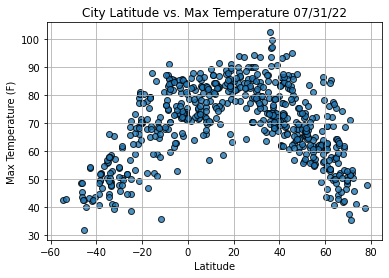

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

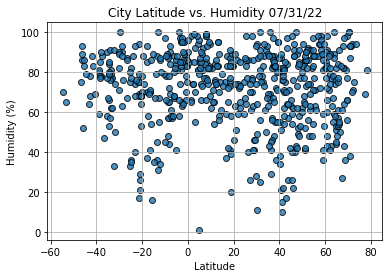

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

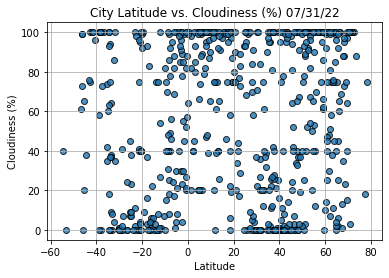

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

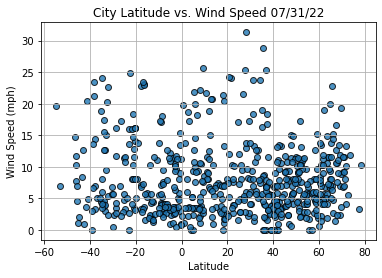

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
index13 = city_data_df.loc[13]

In [24]:
index13

City                      Ushuaia
Country                        AR
Date          2022-07-31 03:32:48
Lat                         -54.8
Lng                         -68.3
Max Temp                    42.46
Humidity                       70
Cloudiness                     40
Wind Speed                  19.57
Name: 13, dtype: object

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

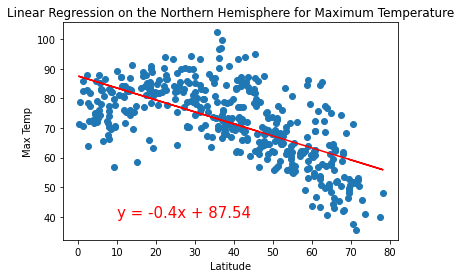

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
 for Maximum Temperature', 'Max Temp',(10,40))

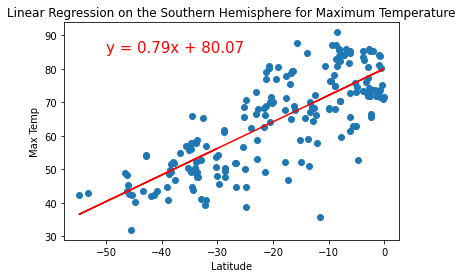

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,85))

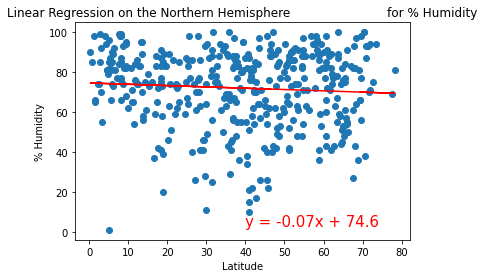

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,3))

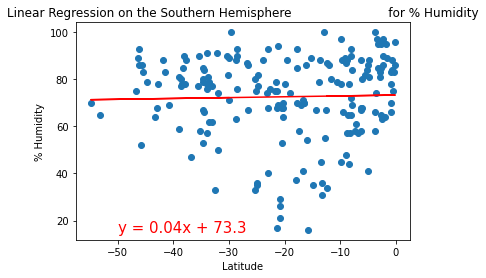

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

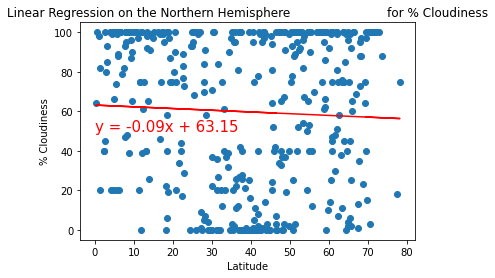

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,50))

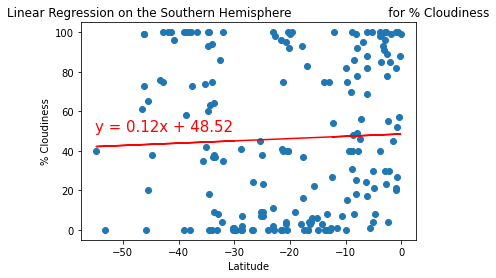

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,50))

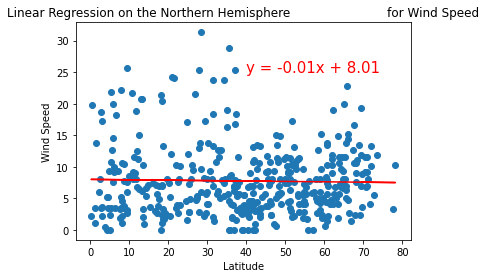

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

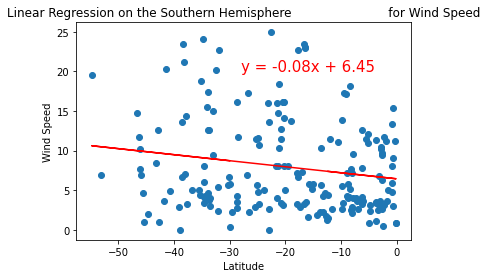

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-28,20))